# Proyecto Data Science: Predicción de la frecuencia de accidentes automovilísticos

Integrantes:
- Rayén Millamán
- Robinson García
- Diego Pastrián
- Joaquín Villegas

El link hacia los datasets utilizados ya preparados se encuentran en el siguiente link:

- https://drive.google.com/drive/folders/1GWZMHObX4UyG8CQXiUX9aQ569zk__IbZ?usp=sharing

Los dataset utilizados dentro de este proyecto es posible obtenerlos en los siguientes links:

- https://www.carabineros.cl/transparencia/tproactiva/rpro_os2.html
- https://www.ine.gob.cl/estadisticas/sociales/demografia-y-vitales/proyecciones-de-poblacion
- https://www.ine.gob.cl/estadisticas/economia/transporte-y-comunicaciones/permiso-de-circulacion

# Procesamiento de los Datos

## Datos de entrenamiento

In [ ]:
!pip install openpyxl

from google.colab import files
uploaded = files.upload()


Saving accidentes_completo_con_vehiculos_y_poblacion (1).csv to accidentes_completo_con_vehiculos_y_poblacion (1).csv


In [ ]:
import pandas as pd

df_completo = pd.read_csv("/content/Dataset_Train.csv")

print(df_completo.head())

df_completo.info()

<ipython-input-1-dd3dcf44f147>:3: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_completo = pd.read_csv("/content/Dataset_Train.csv")


   Idaccidente       Fecha  Mes      Hora  Comuna_x    Nomcomuna  \
0      1410359  2022-01-01    1  00:00:00      9209      renaico   
1      1413819  2022-01-01    1  00:00:00     13302        lampa   
2      1410119  2022-01-01    1  00:05:00      9211     victoria   
3      1410166  2022-01-01    1  00:10:00      5601  san antonio   
4      1411074  2022-01-01    1  00:10:00      2101  antofagasta   

          Región  Accdtes.                                             Causas  \
0      ARAUCANÍA  Colisión               Señalización, desobedecer señal pare   
1  METROPOLITANA  Colisión  Conducción sin mantener distancia razonable ni...   
2      ARAUCANÍA    Choque                   Conducción en estado de ebriedad   
3     VALPARAÍSO  Colisión       Señalización, desobedecer señal ceda el paso   
4    ANTOFAGASTA    Choque                 Velocidad no razonable ni prudente   

   Muertos  ...  total_vehiculos  Region              Nombre Region  \
0        0  ...           3245.0 

In [ ]:
missing_values = df_completo.isnull().sum()

percentage_missing = (missing_values / df_completo.shape[0]) * 100

print(percentage_missing)

Idaccidente          0.000000
Fecha                0.000000
Mes                  0.000000
Hora                 0.000000
Comuna_x             0.000000
Nomcomuna            0.000000
Región               0.000000
Accdtes.             0.000000
Causas               0.000000
Muertos              0.000000
Graves               0.000000
M/Grave              0.000000
Leves                0.000000
Ilesos               0.000000
Urbano/Rural         0.000000
Calleuno            24.435747
Calledos            47.210387
Frentenumero        76.812670
Ruta                76.073116
Ubicación km        63.644941
Parte Nro.           0.009130
Tribunal             0.020087
año                  0.000000
region              26.032942
provincia           26.032942
comuna              26.032942
total_vehiculos     26.032942
Region              26.200940
Nombre Region       26.200940
Provincia           26.200940
Nombre Provincia    26.200940
Comuna_y            26.200940
Nombre Comuna       26.200940
poblacion 

***columnas_moda*** contiene las columnas a calcular su moda. Se rellenan los valores faltantes para tales columnas con su moda correspondiente como estratégia para imputar datos categóricos faltantes.

In [ ]:
columnas_moda = ['Calleuno', 'Calledos', 'Tribunal']

for col in columnas_moda:
    if col in df_completo.columns:
        moda = df_completo[col].mode()
        if not moda.empty:
            df_completo[col] = df_completo[col].fillna(moda[0])


A continuación se observa que las columnas 'Calleuno', 'Calledos' y  'Tribunal' ya no tienen datos faltantes.

In [ ]:
missing_values = df_completo.isnull().sum()

percentage_missing = (missing_values / df_completo.shape[0]) * 100

print(percentage_missing)

Idaccidente          0.000000
Fecha                0.000000
Mes                  0.000000
Hora                 0.000000
Comuna_x             0.000000
Nomcomuna            0.000000
Región               0.000000
Accdtes.             0.000000
Causas               0.000000
Muertos              0.000000
Graves               0.000000
M/Grave              0.000000
Leves                0.000000
Ilesos               0.000000
Urbano/Rural         0.000000
Calleuno             0.000000
Calledos             0.000000
Frentenumero        76.812670
Ruta                76.073116
Ubicación km        63.644941
Parte Nro.           0.009130
Tribunal             0.000000
año                  0.000000
region              26.032942
provincia           26.032942
comuna              26.032942
total_vehiculos     26.032942
Region              26.200940
Nombre Region       26.200940
Provincia           26.200940
Nombre Provincia    26.200940
Comuna_y            26.200940
Nombre Comuna       26.200940
poblacion 

A continuación se eliminan columnas no útiles para el estudio o que se repiten.

In [ ]:
columnas_a_eliminar = [
    'Idaccidente', 'Fecha', 'Provincia', 'region', 'Parte Nro.', 'comuna', 'Region', 'Nombre Comuna', 'Nombre Provincia', 'Región', 'Rolruta', 'Ubicacionkm', 'Siniestros', 'Accdte', 'Partenro', 'Mes2', 'Frentenumero', 'Ruta', 'Ubicación km'
]

# Eliminar columnas con +90% nulos (personalizado)
df_completo = df_completo.drop(columns=columnas_a_eliminar, errors='ignore')

# Confirmar que se eliminaron
print("Columnas restantes:", df_completo.shape[1])

Columnas restantes: 23


Se vuelve a repetir el proceso de imputación con moda para otras variables, asegurando que no existan NaNs en ellas.

In [ ]:
columnas_moda = ['Nombre Region', 'provincia', 'Calleuno', 'Calledos', 'Tribunal']

for col in columnas_moda:
    if col in df_completo.columns:
        moda = df_completo[col].mode()
        if not moda.empty:
            df_completo[col] = df_completo[col].fillna(moda[0])


Para la variable numérica total_vehiculos, se rellenan los datos faltantes con el promedio de vehículos.

In [ ]:
if 'total_vehiculos' in df_completo.columns:
    media_vehiculos = df_completo['total_vehiculos'].mean()
    df_completo['total_vehiculos'] = df_completo['total_vehiculos'].fillna(media_vehiculos)
    print(f"Rellenado 'total_vehiculos' con la media: {media_vehiculos:.2f}")


Rellenado 'total_vehiculos' con la media: 48065.93


Para la columna ***Comuna_y***, que corresponde a la variable objetivo (Cantidad de accidentes por comuna), se rellenan los valores faltantes con el código de comuna mediano. Se usa la mediana en lugar de la media para variables numéricas cuando se sospecha que la distribución de los datos podría estar sesgada por outliers.

In [ ]:
if 'Comuna_y' in df_completo.columns:
    mediana_comuna = df_completo['Comuna_y'].median()
    df_completo['Comuna_y'] = df_completo['Comuna_y'].fillna(mediana_comuna)
    print(f"Rellenado 'Comuna_y' con la media: {mediana_comuna:.2f}")

Rellenado 'Comuna_y' con la media: 9112.00


Para la variable numérica ***poblacion***, se utiliza la media (promedio de la población) para rellenar los datos faltantes.

In [ ]:
if 'poblacion' in df_completo.columns:
    media_poblacion = df_completo['poblacion'].mean()
    df_completo['poblacion'] = df_completo['poblacion'].fillna(media_poblacion)
    print(f"Rellenado 'total_poblacion' con la media: {media_poblacion:.2f}")


Rellenado 'total_poblacion' con la media: 175849.74


## Datos de Prueba
A continuación, se realiza el mismo tratado con los datos de Test para sus posteriores pruebas.

In [ ]:
  df_test = pd.read_csv("/content/Dataset_Test.csv")

  print(df_test.head())

  df_test.info()

   Idaccidente       Fecha  Mes      Hora  Comuna  Comunas  \
0      1600335  2024-03-01    3  00:15:00    7404      NaN   
1      1593947  2024-03-01    3  00:30:00   13109      NaN   
2      1594830  2024-03-01    3  01:15:00    6203      NaN   
3      1594377  2024-03-01    3  01:25:00   10106      NaN   
4      1597512  2024-03-01    3  01:30:00   13301      NaN   

                Región   Accdtes.  \
0                MAULE     Choque   
1        METROPOLITANA   Colisión   
2  LIB. BDO. O´HIGGINS     Choque   
3            LOS LAGOS  Volcadura   
4        METROPOLITANA     Choque   

                                              Causas Urbano/Rural  ... Mes2  \
0                   Conducción en estado de ebriedad       URBANO  ...  NaN   
1  Conducción, cambiar sorpresivamente pista circ...       URBANO  ...  NaN   
2                   Conducción en estado de ebriedad        RURAL  ...  NaN   
3  Conducción no atento condiciones transito momento        RURAL  ...  NaN   
4        

<ipython-input-10-3f116d87448f>:1: DtypeWarning: Columns (7,20,25,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("/content/Dataset_Test.csv")


In [ ]:
missing_values = df_test.isnull().sum()

percentage_missing = (missing_values / df_test.shape[0]) * 100

print(percentage_missing)

Idaccidente                0.000000
Fecha                      0.000000
Mes                        0.000000
Hora                       0.000000
Comuna                     0.000000
Comunas                  100.000000
Región                    10.693537
Accdtes.                  47.664446
Causas                     0.000000
Urbano/Rural               0.000000
Calleuno                  21.999957
Calledos                  44.736226
Frentenumero              76.659360
Ruta                      83.215935
Ubicación km              64.014386
Muertos                   36.970909
Graves                     0.000000
M/Grave                    0.000000
Leves                      0.000000
Ilesos                     0.000000
Parte Nro.                10.723330
Tribunal                   0.055330
Nomcomuna                  0.000000
Rolruta                   95.977953
Ubicacionkm               90.238556
Siniestros                63.029091
Fallecidos                63.029091
Region                    89

In [ ]:
columnas_a_eliminar = [
    'Idaccidente', 'Fallecidos', 'Comunas', 'region', 'Parte Nro.', 'comuna', 'Region', 'Nombre Comuna', 'Provincia', 'Fecha',
    'Nombre Provincia', 'Región', 'Rolruta', 'Ubicacionkm',
    'Siniestros', 'Accdte', 'Partenro', 'Mes2', 'Frentenumero', 'Ruta',
    'Ubicación km', 'Comuna_y'
]

# Eliminar columnas con +90% nulos (personalizado)
df_test = df_test.drop(columns=columnas_a_eliminar, errors='ignore')

# Confirmar que se eliminaron
print("Columnas restantes:", df_test.shape[1])

Columnas restantes: 23


In [ ]:
columnas_moda = ['Accdtes.','Comunas','Provincia', 'Nombre Region', 'provincia', 'Calleuno', 'Calledos', 'Tribunal']

for col in columnas_moda:
    if col in df_test.columns:
        moda = df_test[col].mode()
        if not moda.empty:
            df_test[col] = df_test[col].fillna(moda[0])

In [ ]:
if 'Muertos' in df_test.columns:
    media_muertos = df_test['Muertos'].mean()
    df_test['Muertos'] = df_test['Muertos'].fillna(media_muertos)
    print(f"Rellenado 'Muertos' con la media: {media_muertos:.2f}")


Rellenado 'Muertos' con la media: 0.02


In [ ]:
missing_values = df_test.isnull().sum()

percentage_missing = (missing_values / df_test.shape[0]) * 100

print(percentage_missing)

Mes                      0.0
Hora                     0.0
Comuna                   0.0
Accdtes.                 0.0
Causas                   0.0
Urbano/Rural             0.0
Calleuno                 0.0
Calledos                 0.0
Muertos                  0.0
Graves                   0.0
M/Grave                  0.0
Leves                    0.0
Ilesos                   0.0
Tribunal                 0.0
Nomcomuna                0.0
año                      0.0
Nomcomuna_normalizada    0.0
comuna_x                 0.0
poblacion                0.0
comuna_y                 0.0
total_vehiculos          0.0
Día                      0.0
Año                      0.0
dtype: float64


In [ ]:
missing_values = df_completo.isnull().sum()

percentage_missing = (missing_values / df_completo.shape[0]) * 100

print(percentage_missing)

Mes                0.0
Hora               0.0
Comuna_x           0.0
Nomcomuna          0.0
Accdtes.           0.0
Causas             0.0
Muertos            0.0
Graves             0.0
M/Grave            0.0
Leves              0.0
Ilesos             0.0
Urbano/Rural       0.0
Calleuno           0.0
Calledos           0.0
Tribunal           0.0
año                0.0
provincia          0.0
total_vehiculos    0.0
Nombre Region      0.0
Comuna_y           0.0
poblacion          0.0
Día                0.0
Año                0.0
dtype: float64


In [ ]:
if 'Muertos' in df_test.columns:
    media_muertos = df_test['Muertos'].mean()
    df_test['Muertos'] = df_test['Muertos'].fillna(media_muertos)
    print(f"Rellenado 'Muertos' con la media: {media_muertos:.2f}")


Rellenado 'Muertos' con la media: 0.02





# Analisis exploratorio de datos

A continuacion se muestran toddas las variables luego de la limpieza de datos

In [ ]:
import pandas as pd


print(df.columns)
print(df.shape)


Primeras filas de la tabla resultante

In [ ]:
df.head()

In [ ]:
df.info()

Analisis univariado de variables numericas

In [ ]:
df.describe()

Analisis univariado de varaibles categoricas

In [ ]:
df.describe(include='object')

Separacion de variables numericas y categoricas

In [ ]:
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(exclude=["number"]).columns

###Histogramas y boxplot para Variables numericas


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns  # ✅ Importación necesaria

# Histograma y Box Plot para variable numérica
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # Histograma
    sns.histplot(df[col], bins=20, ax=axes[0])
    axes[0].set_title(f"Distribución de {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_long = df.melt(
    value_vars=['Ilesos', 'Leves', 'Graves', 'M/Grave', 'Muertos'],
    var_name='severidad',
    value_name='cantidad'
)
df_sum = df_long.groupby('severidad')['cantidad'].sum().reset_index()


sns.barplot(data=df_sum, x='severidad', y='cantidad')
plt.title('Total de personas por severidad de accidente')
plt.ylabel('Cantidad de personas')
plt.xlabel('Severidad')
plt.show()


###Asimetrias

- 0: Distribución simétrica.
- '>' 0: Distribución sesgada hacia la derecha (asimetría positiva).
- '<' 0: Distribución sesgada hacia la izquierda (asimetría negativa).

In [ ]:
import pandas as pd
from scipy.stats import skew

resultados = []

# Ciclo for para recorrer las columnas
for col in numeric_cols:
    asimetria = skew(df[col].dropna())
    resultados.append({'Columna': col, 'Asimetría': asimetria})

# Crear el DataFrame a partir de la lista de resultados
asimetria_resultados_df = pd.DataFrame(resultados)

In [ ]:
asimetria_resultados_df

Se observa una alta asimetria en los niveles de severidad de accidente

###Grafico de barras

A continuacion de observa las graficas de barras para las variables categoricas importantes

In [ ]:
%matplotlib inline

# Gráfico de Barras para cada variable categórica
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Frecuencia de {col}")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)
    plt.show()


###Analisis Bivariado

Cantidad de accidente por mes segun region en chile

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar accidentes por día y mes
conteo_dia_mes = df.groupby(['Nombre Region', 'Mes']).size().reset_index(name='accidentes')

# Gráfico de barras con hue
plt.figure(figsize=(14, 6))
sns.barplot(data=conteo_dia_mes, x='Mes', y='accidentes', hue='Nombre Region')
plt.title("Accidentes por mes y region")
plt.xlabel("Mes")
plt.ylabel("Cantidad de accidentes")
plt.legend(title='Regiones', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Modelamiento

Random Forest - Métricas de evaluación:
R²             : 0.2388
MAE            : 122.72
MSE            : 49299.40
RMSE           : 222.03
MedAE          : 43.41
Max Error      : 1059.27
MAPE    : 84.25%

Comunas con mayor riesgo estimado:
           comuna  accidentes_predichos
7     antofagasta               1697.56
258      santiago               1642.62
265        temuco               1605.87
203   puente alto               1568.27
285  viña del mar               1534.16
277    valparaiso               1501.41
57       coquimbo               1416.11
204  puerto montt               1413.71
239  san bernardo               1409.36
94        iquique               1406.21


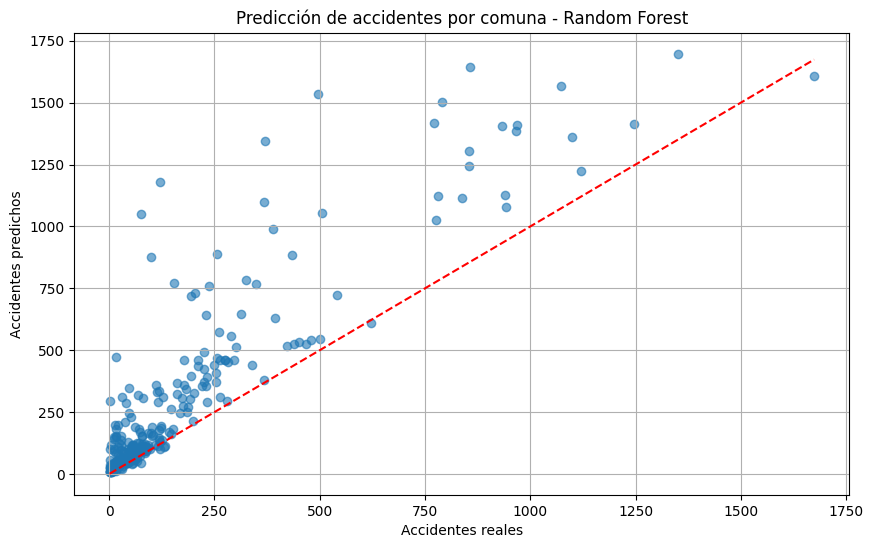

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    median_absolute_error, max_error
)
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
df_train = pd.read_csv("Dataset_Train.csv", low_memory=False)
df_test = pd.read_csv("Dataset_Test.csv", low_memory=False)

# Preprocesamiento
df_train["comuna"] = df_train["Nomcomuna"].astype(str).str.lower().str.strip()
df_test["comuna"] = df_test["Nomcomuna"].astype(str).str.lower().str.strip()
df_train["zona_urbana"] = df_train["Urbano/Rural"].astype(str).str.lower().str.strip().apply(lambda x: 1 if x == "urbano" else 0)
df_test["zona_urbana"] = df_test["Urbano/Rural"].astype(str).str.lower().str.strip().apply(lambda x: 1 if x == "urbano" else 0)

meses = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4,
    "mayo": 5, "junio": 6, "julio": 7, "agosto": 8,
    "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12
}
df_train["Mes"] = df_train["Mes"].astype(str).str.lower().map(meses).fillna(df_train["Mes"]).astype(float)
df_test["Mes"] = df_test["Mes"].astype(str).str.lower().map(meses).fillna(df_test["Mes"]).astype(float)

# Variables de entrada
features = ["total_vehiculos", "poblacion", "Mes", "zona_urbana", "Muertos", "Graves", "M/Grave", "Leves", "Ilesos"]

# Agrupación por comuna y año
df_train_grouped = df_train.groupby(["comuna", "año"]).agg({**{col: "mean" for col in features}, "Idaccidente": "count"}).rename(columns={"Idaccidente": "total_accidentes"}).reset_index()
df_test_grouped = df_test.groupby(["comuna", "año"]).agg({**{col: "mean" for col in features}, "Idaccidente": "count"}).rename(columns={"Idaccidente": "total_accidentes"}).reset_index()

# Imputación de valores faltantes
imputer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(imputer.fit_transform(df_train_grouped[features]), columns=features)
X_test = pd.DataFrame(imputer.transform(df_test_grouped[features]), columns=features)
y_train = df_train_grouped["total_accidentes"]
y_test = df_test_grouped["total_accidentes"]

# Entrenamiento del modelo
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
df_test_grouped["accidentes_predichos"] = modelo_rf.predict(X_test)
y_pred = df_test_grouped["accidentes_predichos"]

# Métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
maxerr = max_error(y_test, y_pred)
mape_mask = y_test > 100
mape = np.mean(np.abs((y_test[mape_mask] - y_pred[mape_mask]) / y_test[mape_mask])) * 100

# Resultados de evaluación
print("Random Forest - Métricas de evaluación:")
print(f"R²             : {r2:.4f}")
print(f"MAE            : {mae:.2f}")
print(f"MSE            : {mse:.2f}")
print(f"RMSE           : {rmse:.2f}")
print(f"MedAE          : {medae:.2f}")
print(f"Max Error      : {maxerr:.2f}")
print(f"MAPE    : {mape:.2f}%")

# Comunas con mayor riesgo estimado
print("\nComunas con mayor riesgo estimado:")
print(df_test_grouped.sort_values(by="accidentes_predichos", ascending=False)[["comuna", "accidentes_predichos"]].head(10))

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Accidentes reales")
plt.ylabel("Accidentes predichos")
plt.title("Predicción de accidentes por comuna - Random Forest")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Gradient Boosting - Métricas completas:
R²             : 0.2031
MAE            : 114.40
MSE            : 51614.22
RMSE           : 227.19
MedAE          : 29.47
Max Error      : 1177.37
MAPE : 77.76%

Comunas con mayor riesgo estimado:
           comuna  accidentes_predichos_gb
265        temuco              1865.997722
7     antofagasta              1740.572465
138         maipu              1668.558777
203   puente alto              1668.245432
285  viña del mar              1653.103344
57       coquimbo              1629.704471
277    valparaiso              1617.445170
258      santiago              1607.208781
239  san bernardo              1542.106094
53     concepcion              1487.604883


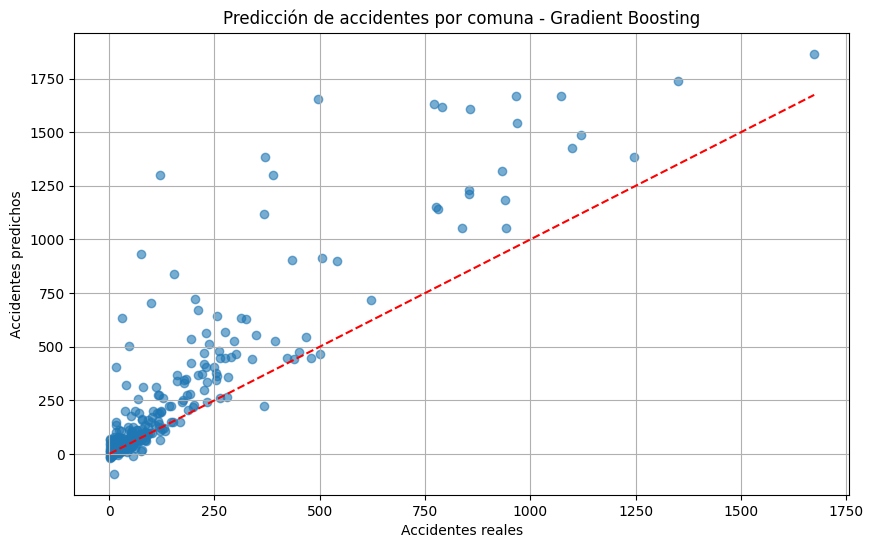

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    median_absolute_error, max_error
)
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
df_train = pd.read_csv("Dataset_Train.csv", low_memory=False)
df_test = pd.read_csv("Dataset_Test.csv", low_memory=False)

# Preprocesamiento
df_train["comuna"] = df_train["Nomcomuna"].astype(str).str.lower().str.strip()
df_test["comuna"] = df_test["Nomcomuna"].astype(str).str.lower().str.strip()
df_train["zona_urbana"] = df_train["Urbano/Rural"].astype(str).str.lower().str.strip().apply(lambda x: 1 if x == "urbano" else 0)
df_test["zona_urbana"] = df_test["Urbano/Rural"].astype(str).str.lower().str.strip().apply(lambda x: 1 if x == "urbano" else 0)

meses = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4,
    "mayo": 5, "junio": 6, "julio": 7, "agosto": 8,
    "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12
}
df_train["Mes"] = df_train["Mes"].astype(str).str.lower().map(meses).fillna(df_train["Mes"]).astype(float)
df_test["Mes"] = df_test["Mes"].astype(str).str.lower().map(meses).fillna(df_test["Mes"]).astype(float)

# Variable adicional: densidad vehicular
df_train["densidad_vehicular"] = df_train["total_vehiculos"] / df_train["poblacion"]
df_test["densidad_vehicular"] = df_test["total_vehiculos"] / df_test["poblacion"]

# Variables predictoras
features = [
    "total_vehiculos", "poblacion", "densidad_vehicular", "Mes", "zona_urbana",
    "Muertos", "Graves", "M/Grave", "Leves", "Ilesos"
]

# Agrupación por comuna y año
df_train_grouped = df_train.groupby(["comuna", "año"]).agg(
    {**{col: "mean" for col in features}, "Idaccidente": "count"}
).rename(columns={"Idaccidente": "total_accidentes"}).reset_index()

df_test_grouped = df_test.groupby(["comuna", "año"]).agg(
    {**{col: "mean" for col in features}, "Idaccidente": "count"}
).rename(columns={"Idaccidente": "total_accidentes"}).reset_index()

# Imputación de valores faltantes
imputer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(imputer.fit_transform(df_train_grouped[features]), columns=features)
X_test = pd.DataFrame(imputer.transform(df_test_grouped[features]), columns=features)
y_train = df_train_grouped["total_accidentes"]
y_test = df_test_grouped["total_accidentes"]

# Modelo Gradient Boosting
modelo_gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
modelo_gb.fit(X_train, y_train)
df_test_grouped["accidentes_predichos_gb"] = modelo_gb.predict(X_test)
y_pred = df_test_grouped["accidentes_predichos_gb"]

# Métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
maxerr = max_error(y_test, y_pred)
mape_mask = y_test > 100
mape = np.mean(np.abs((y_test[mape_mask] - y_pred[mape_mask]) / y_test[mape_mask])) * 100

# Mostrar métricas
print("Gradient Boosting - Métricas completas:")
print(f"R²             : {r2:.4f}")
print(f"MAE            : {mae:.2f}")
print(f"MSE            : {mse:.2f}")
print(f"RMSE           : {rmse:.2f}")
print(f"MedAE          : {medae:.2f}")
print(f"Max Error      : {maxerr:.2f}")
print(f"MAPE : {mape:.2f}%")

# Top comunas con mayor riesgo estimado
print("\nComunas con mayor riesgo estimado:")
print(df_test_grouped.sort_values(by="accidentes_predichos_gb", ascending=False)[["comuna", "accidentes_predichos_gb"]].head(10))

# Gráfico real vs predicho
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Accidentes reales")
plt.ylabel("Accidentes predichos")
plt.title("Predicción de accidentes por comuna - Gradient Boosting")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


XGBoost - Métricas completas:
R²             : 0.5416
MAE            : 92.81
MSE            : 29691.27
RMSE           : 172.31
MedAE          : 33.30
Max Error      : 1110.14
MAPE     : 63.58%

Comunas con mayor riesgo estimado:
           comuna  accidentes_predichos_xgb
265        temuco               1459.578857
7     antofagasta               1389.861572
285  viña del mar               1377.202637
277    valparaiso               1361.210815
239  san bernardo               1344.754272
203   puente alto               1329.676270
258      santiago               1316.604492
262         talca               1314.891479
53     concepcion               1311.991577
138         maipu               1305.802246


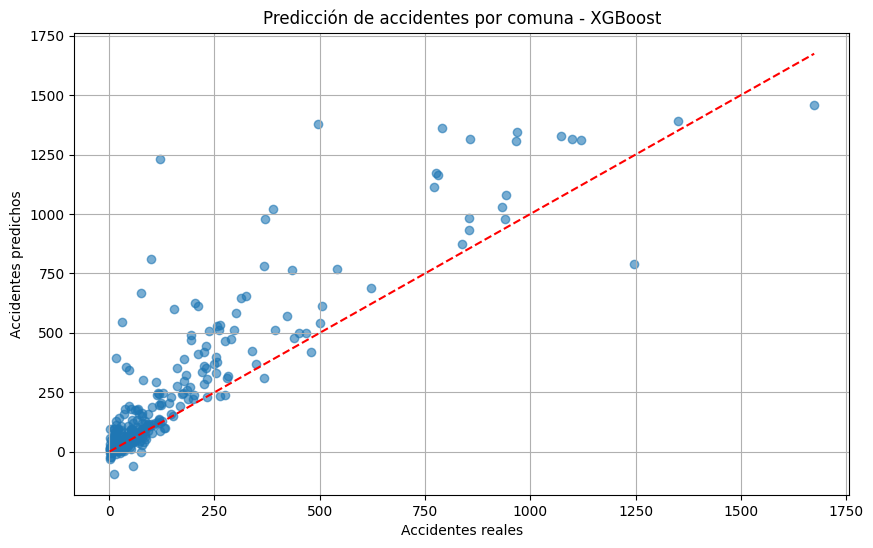

In [ ]:

import xgboost as xgb
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error,
    median_absolute_error, max_error
)
import numpy as np
import matplotlib.pyplot as plt


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    "objective": "reg:squarederror",
    "max_depth": 5,
    "eta": 0.1,
    "seed": 42
}
modelo_xgb = xgb.train(params, dtrain, num_boost_round=200)

df_test_grouped["accidentes_predichos_xgb"] = modelo_xgb.predict(dtest)
y_pred = df_test_grouped["accidentes_predichos_xgb"]

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred)
maxerr = max_error(y_test, y_pred)


mask = y_test > 100
mape_filtrado = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100


print("XGBoost - Métricas completas:")
print(f"R²             : {r2:.4f}")
print(f"MAE            : {mae:.2f}")
print(f"MSE            : {mse:.2f}")
print(f"RMSE           : {rmse:.2f}")
print(f"MedAE          : {medae:.2f}")
print(f"Max Error      : {maxerr:.2f}")
print(f"MAPE     : {mape_filtrado:.2f}%")

print("\nComunas con mayor riesgo estimado:")
print(df_test_grouped.sort_values(by="accidentes_predichos_xgb", ascending=False)[["comuna", "accidentes_predichos_xgb"]].head(10))

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Accidentes reales")
plt.ylabel("Accidentes predichos")
plt.title("Predicción de accidentes por comuna - XGBoost")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


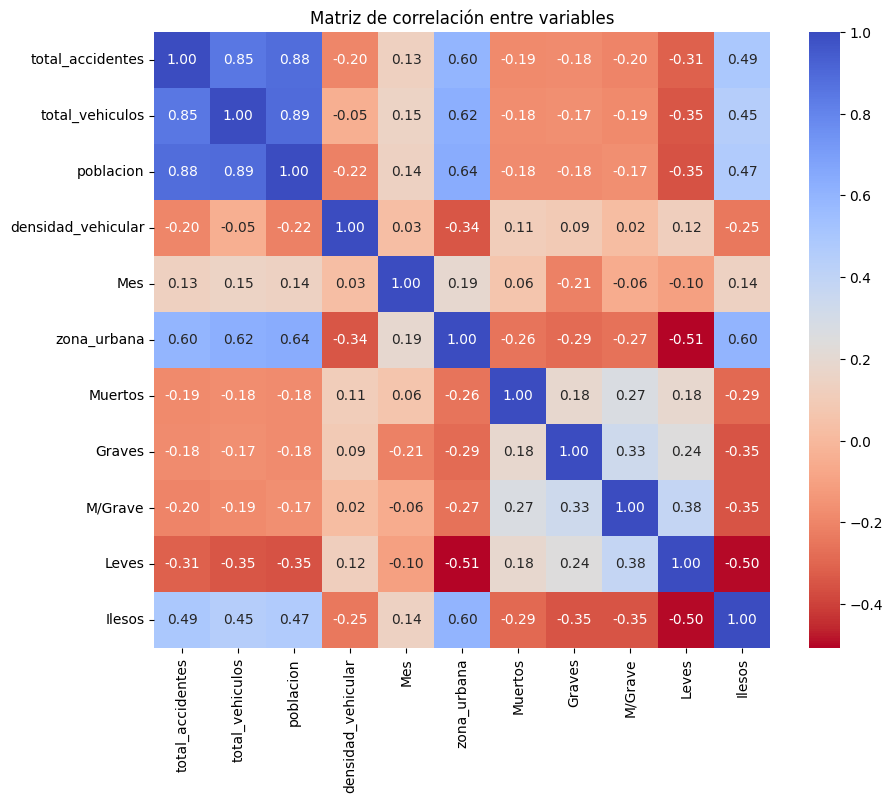

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_data = df_train_grouped[[
    "total_accidentes", "total_vehiculos", "poblacion", "densidad_vehicular",
    "Mes", "zona_urbana", "Muertos", "Graves", "M/Grave", "Leves", "Ilesos"
]]

correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm_r", square=True)
plt.title("Matriz de correlación entre variables")
plt.show()
